# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

In [3]:
# Create a dataframe from cities list
cities_df = pd.DataFrame(cities, columns =['City'])                                           
cities_df 

,City
0,atuona
1,karaul
2,pochutla
3,thompson
4,amderma
...,...
578,sistranda
579,nhulunbuy
580,vallenar
581,kamaishi


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create column headers for city, cloudiness, country,
# date, humidity, lat, lng, max temp, and wind speed                                                                      

cities_df["Cloudiness"]=""
cities_df["Country"]=""
cities_df["Date"]=""
cities_df["Humidity"]=""
cities_df["Lat"]=""
cities_df["Lng"]=""
cities_df["Max Temp"] =""
cities_df["Wind Speed"]=""

#http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID={APIKEY}

# Create counter and set to zero
row_count = 0

# Call API openweather and gather data for cities
for index, row in cities_df.iterrows():
    
    # Create dictionary of parameters
    params = {
    "q": cities_df.loc[index]["City"],
    "units": "IMPERIAL",
    "mode": "json",
    "appid": weather_api_key}
    
    #API url
    base_url = "http://api.openweathermap.org/data/2.5/weather?"

    # Print city name and city count
    print("Now retrieving city #%s: %s" % (row_count, cities_df.loc[index]["City"]))
    row_count += 1 
    
    # Capture data for cities
    data = requests.get(base_url, params=params).json()
    try:
        
        cloud = data['clouds']['all']
        country = data["sys"]["country"]
        date = data["dt"]
        humidity = data['main']['humidity']
        lat = data["coord"]["lat"]
        long = data["coord"]["lon"]
        max_temp = data["main"]["temp_max"]
        city_wind = data['wind']['speed']
       
        cities_df.set_value(index, "Cloudiness", cloud)
        cities_df.set_value(index, "Country", country)
        cities_df.set_value(index, "Date", date)
        cities_df.set_value(index, "Humidity", humidity)
        cities_df.set_value(index, "Lat", lat)
        cities_df.set_value(index, "Lng", long)
        cities_df.set_value(index, "Max Temp", max_temp)
        cities_df.set_value(index, "Wind Speed", city_wind)
        
    # Print statement if city is not found    
    except:
        print("City not found. Skipping...")
        continue 
    


Now retrieving city #0: atuona
Now retrieving city #1: karaul


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\s

City not found. Skipping...
Now retrieving city #2: pochutla
Now retrieving city #3: thompson
Now retrieving city #4: amderma
City not found. Skipping...
Now retrieving city #5: punta arenas
Now retrieving city #6: karakose
City not found. Skipping...
Now retrieving city #7: busselton
Now retrieving city #8: qaanaaq
Now retrieving city #9: tessalit
Now retrieving city #10: jamestown
Now retrieving city #11: yellamanchili
City not found. Skipping...
Now retrieving city #12: hermanus
Now retrieving city #13: hilo
Now retrieving city #14: bengkulu
Now retrieving city #15: acton vale
Now retrieving city #16: tucuma
Now retrieving city #17: half moon bay
Now retrieving city #18: airai
Now retrieving city #19: pyaozerskiy
Now retrieving city #20: castro
Now retrieving city #21: saskylakh
Now retrieving city #22: hithadhoo
Now retrieving city #23: guerrero negro
Now retrieving city #24: aripuana
Now retrieving city #25: chokurdakh
Now retrieving city #26: kapaa
Now retrieving city #27: hami
N

Now retrieving city #219: nohar
Now retrieving city #220: lebu
Now retrieving city #221: strani
Now retrieving city #222: biltine
Now retrieving city #223: barrow
Now retrieving city #224: cumra
Now retrieving city #225: inhambane
Now retrieving city #226: avera
Now retrieving city #227: cabo san lucas
Now retrieving city #228: sitka
Now retrieving city #229: nizwa
Now retrieving city #230: kaitangata
Now retrieving city #231: pevek
Now retrieving city #232: san vicente de canete
Now retrieving city #233: kidal
Now retrieving city #234: sakiai
Now retrieving city #235: bolungarvik
City not found. Skipping...
Now retrieving city #236: cururupu
Now retrieving city #237: uarini
Now retrieving city #238: hun
Now retrieving city #239: matara
Now retrieving city #240: trat
Now retrieving city #241: faya
Now retrieving city #242: jinchengjiang
City not found. Skipping...
Now retrieving city #243: xingcheng
Now retrieving city #244: qasigiannguit
Now retrieving city #245: zachagansk
City not f

Now retrieving city #440: mucurapo
Now retrieving city #441: graaff-reinet
Now retrieving city #442: nyurba
Now retrieving city #443: port-cartier
Now retrieving city #444: onufriyivka
Now retrieving city #445: lakeway
Now retrieving city #446: bambous virieux
Now retrieving city #447: caravelas
Now retrieving city #448: cap-aux-meules
Now retrieving city #449: kayerkan
Now retrieving city #450: tabou
Now retrieving city #451: nova olimpia
Now retrieving city #452: peace river
Now retrieving city #453: falealupo
City not found. Skipping...
Now retrieving city #454: brigantine
Now retrieving city #455: one hundred mile house
City not found. Skipping...
Now retrieving city #456: zheshart
Now retrieving city #457: port hawkesbury
Now retrieving city #458: banyo
Now retrieving city #459: miri
Now retrieving city #460: sokoni
Now retrieving city #461: ous
Now retrieving city #462: tuy hoa
Now retrieving city #463: muncar
Now retrieving city #464: ronne
Now retrieving city #465: morondava
No

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Save the dataframe to designated output file as a csv
cities_df.to_csv(output_data_file, encoding="utf-8", index=False)
# Cities and corresponding data count
cities_df.count()


City          583
Cloudiness    583
Country       583
Date          583
Humidity      583
Lat           583
Lng           583
Max Temp      583
Wind Speed    583
dtype: int64

In [6]:
# Print sample of cities dataframe
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,atuona,2,PF,1585008293,76,-9.8,-139.03,82.49,10.94
1,karaul,,,,,,,,
2,pochutla,40,MX,1585008293,62,15.74,-96.47,86,11.41
3,thompson,75,CA,1585008293,46,55.74,-97.86,28.4,4.7
4,amderma,,,,,,,,


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

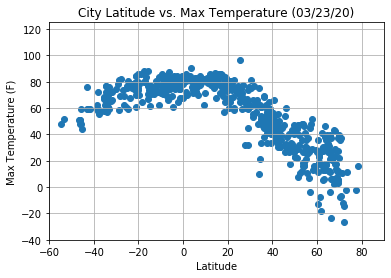

Temps are highest at prime meridian.


In [7]:
# read new data
data_df = pd.read_csv(output_data_file)
# Capture unix time stamp and convert to date
date_unix = data_df.iloc[0,3]
date = time.strftime("%D", time.localtime(int(date_unix)))

#date = time.strftime("%D %H:%M", time.localtime(int(date_unix)))

# Define x and y axis
x_axis = data_df["Lat"]
y_axis = data_df["Max Temp"]

x = x_axis
y = y_axis

# Set plot limits and show grid
plt.grid(True)
plt.xlim([-60, 90])
plt.ylim([-40, 125])
# Set plot title and label x and y axis
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.scatter(x, y)
# Save plot to file
plt.savefig('City_Lat_vs_Max_Temp.png')
# plot to screen
plt.show()
print("Temps are highest at prime meridian.")

#### Latitude vs. Humidity Plot

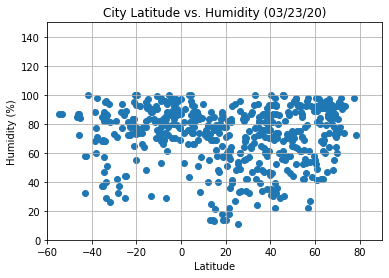

Majority of cities have humidity gretaer than 60%


In [8]:
# Capture unix time stamp and convert to date
date_unix = data_df.iloc[0,3]
date = time.strftime("%D", time.localtime(int(date_unix)))

#date = time.strftime("%D %H:%M", time.localtime(int(date_unix)))

# Define x and y axis
x_axis = data_df["Lat"]
y_axis = data_df["Humidity"]

x = x_axis
y = y_axis
# Set plot limits and show gridlines
plt.grid(True)
plt.xlim([-60, 90])
plt.ylim([0, 150])
# Set plot title and label x and y axis
plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.scatter(x, y)
# Save plot to file
plt.savefig('City_Lat_vs_Humidity.png')
# plot to screen
plt.show()
print("Majority of cities have humidity gretaer than 60%")

#### Latitude vs. Cloudiness Plot

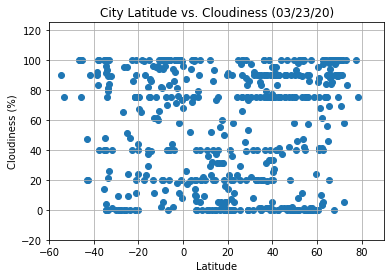

Cloudiness is evenly distributed


In [9]:
# Capture unix time stamp and convert to date
date_unix = data_df.iloc[0,3]
date = time.strftime("%D", time.localtime(int(date_unix)))

#date = time.strftime("%D %H:%M", time.localtime(int(date_unix)))

# Define x and y axis
x_axis = data_df["Lat"]
y_axis = data_df["Cloudiness"]

x = x_axis
y = y_axis
# Set plot limits and show gridlines
plt.grid(True)
plt.xlim([-60, 90])
plt.ylim([-20, 125])
# Set plot title and label x and y axis
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.scatter(x, y)
# Save plot to a file
plt.savefig('City_Lat_vs_Cloudiness.png')
# Plot to screen
plt.show()
print("Cloudiness is evenly distributed")

#### Latitude vs. Wind Speed Plot

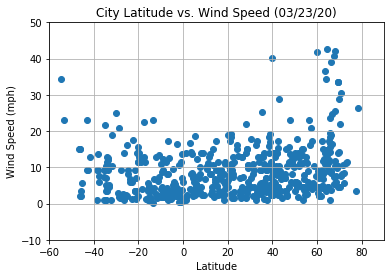

For the majority of cities the wind speed is 0 to 15mph


In [10]:
# Capture unix time stamp and convert to date
date_unix = data_df.iloc[0,3]
date = time.strftime("%D", time.localtime(int(date_unix)))

#date = time.strftime("%D %H:%M", time.localtime(int(date_unix)))

# Define x and y axis
x_axis = data_df["Lat"]
y_axis = data_df["Wind Speed"]

x = x_axis
y = y_axis
# Set plot limits and show gridlines
plt.grid(True)
plt.xlim([-60, 90])
plt.ylim([-10, 50])
# Set plot title and label x and y axis
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(x, y)
# Save plot to a file
plt.savefig('City_Lat_vs_Wind Speed.png')
# Plot to screen
plt.show()
print("For the majority of cities the wind speed is 0 to 15mph")

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots


In [12]:
# Create Northern and Southern Hemisphere DataFrames

nh_df = data_df[data_df.Lat>=0]
sh_df = data_df[data_df.Lat<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.886062150129707


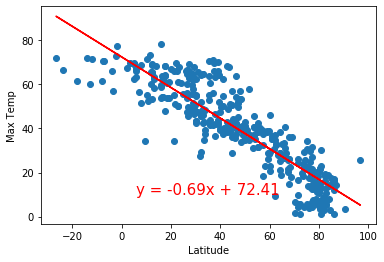

The regression predictions are a strong approximation of the real data.


In [13]:
# Print out the r-squared value along with the plot.
# Define x and y axis
x_values = nh_df['Max Temp']
y_values = nh_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Regression points
regress_values = x_values * slope + intercept
# Slope intercept formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
# Save plot to file
plt.savefig('NH_Max_Temp_vs_Lat_LR.png')
plt.show()
print("The regression predictions are a strong approximation of the real data.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6577738286230264


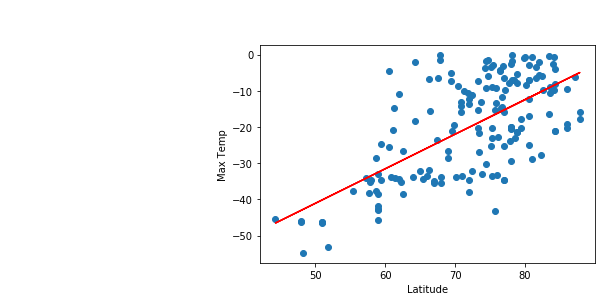

The regression predictions are a moderate approximation of the real data.


In [14]:
# Print out the r-squared value along with the plot.
# Define x and y axis
x_values = sh_df['Max Temp']
y_values = sh_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Regression points
regress_values = x_values * slope + intercept
# Slope intercept formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
# Save plot to file
plt.savefig('SH_Max_Temp_vs_Lat_LR.png')
plt.show()
print("The regression predictions are a moderate approximation of the real data.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1952401182045235


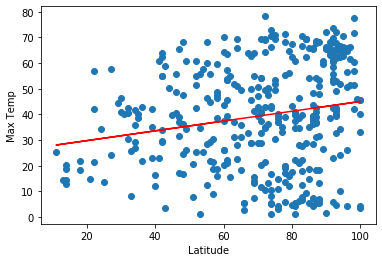

The regression predictions are a poor approximation of the real data.


In [15]:
# Print out the r-squared value along with the plot.
# Define x and y values
x_values = nh_df['Humidity']
y_values = nh_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Regression points
regress_values = x_values * slope + intercept
# Slope intercept formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
# Save plot to a file
plt.savefig('NH_Humidity_vs_Lat_LR.png')
plt.show()
print("The regression predictions are a poor approximation of the real data.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2231433430022854


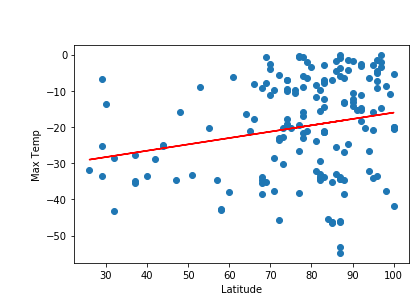

The regression predictions are a poor approximation of the real data.


In [16]:
# Print out the r-squared value along with the plot.
# Define x and y axis
x_values = sh_df['Humidity']
y_values = sh_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Regression points
regress_values = x_values * slope + intercept
# Slope intercept formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
# Save plot to a file
plt.savefig('SH_Humidity_vs_Lat_LR.png')
plt.show()
print("The regression predictions are a poor approximation of the real data.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3203254348184827


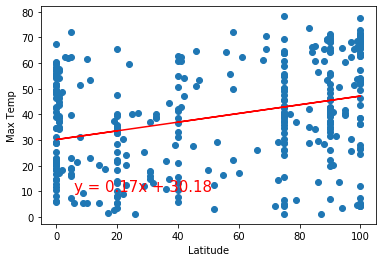

The regression predictions are a poor approximation of the real data.


In [17]:
# Print out the r-squared value along with the plot.
# Define x and y axis
x_values = nh_df['Cloudiness']
y_values = nh_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Regression points
regress_values = x_values * slope + intercept
# Slope intercept formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
# Save plot to a file
plt.savefig('NH_Cloudiness_vs_Lat_LR.png')
plt.show()
print("The regression predictions are a poor approximation of the real data.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04898120870098467


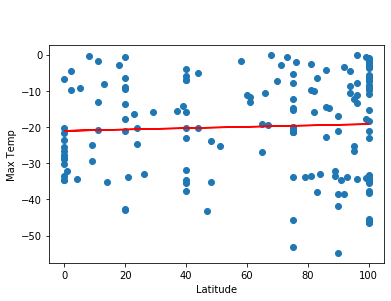

The regression predictions are a poor approximation of the real data.


In [18]:
# Print out the r-squared value along with the plot.
# Define x and y axis
x_values = sh_df['Cloudiness']
y_values = sh_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Regression points
regress_values = x_values * slope + intercept
# Slope intercept formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
# Save plot to a file
plt.savefig('SH_Cloudiness_vs_Lat_LR.png')
plt.show()
print("The regression predictions are a poor approximation of the real data.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.3047102834012446


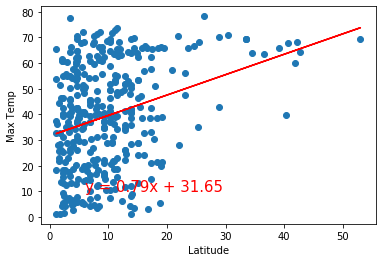

The regression predictions are a poor approximation of the real data.


In [19]:
# Print out the r-squared value along with the plot.
# Define the x and y axis
x_values = nh_df['Wind Speed']
y_values = nh_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Regression points
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
# Save plot to a file
plt.savefig('NH_Wind_Speed_vs_Lat_LR.png')
plt.show()
print("The regression predictions are a poor approximation of the real data.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3510020900823119


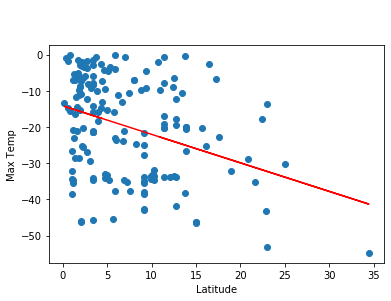

The regression predictions are a poor approximation of the real data.


In [20]:
# Print out the r-squared value along with the plot.
# Define x and y axis
x_values = sh_df['Wind Speed']
y_values = sh_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Regression points
regress_values = x_values * slope + intercept
# Slope intercept formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
# Save plot to a file
plt.savefig('SH_Wind_Speed_vs_Lat_LR.png')
plt.show()
print("The regression predictions are a poor approximation of the real data.")